In [3]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

In [5]:
qsos = pd.read_csv('qso_full_sample.csv', header=1)
qsos

,specobjid,plate,mjd,fiberID,subclass,z,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,nii_6584_flux,nii_6584_flux_err,w1,w2,w3
0,1005512498008320000,893,52589,305,STARBURST,0.038501,1086.95700,13.445690,5999.0170,42.020350,1582.36400,15.046550,3010.8450,20.696370,12.089,11.908,7.834
1,2165278474745440256,1923,53319,629,STARBURST,0.016457,375.86400,5.281759,2068.5040,13.648870,575.60020,5.900801,593.1110,5.842029,12.812,12.661,8.762
2,2908305081193490432,2583,54095,384,STARBURST,0.051987,6372.96200,38.295890,6812.0910,41.000700,2008.34700,13.510290,741.5893,5.987211,13.591,13.268,9.258
3,837747358904117248,744,52251,283,BROADLINE,0.022764,154.59780,10.752410,198.6793,14.250820,68.47856,9.791917,162.8001,12.672370,11.233,11.288,10.554
4,2837441290109478912,2520,54584,631,BROADLINE,0.034883,78.40385,3.972700,117.0103,4.839863,34.39631,3.565499,206.4456,5.043667,11.898,11.943,10.131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1533579628139014144,1362,53050,378,STARFORMING,0.025236,115.03360,4.033701,781.4837,7.725008,214.29840,4.172729,322.2542,5.217882,12.396,12.399,9.657
956,3247247139872466944,2884,54526,552,STARFORMING,0.056460,339.05710,9.086666,3180.3280,24.726840,521.87720,8.259108,1724.3280,17.019960,10.726,10.093,6.381
957,527064949625743360,468,51912,523,NaN,0.035238,397.04130,9.734199,339.9698,12.175190,53.31718,6.877068,579.7974,12.467780,11.857,11.851,10.645
958,3240437313582426112,2878,54465,354,AGN BROADLINE,0.044007,33.92199,3.269411,171.5769,3.730943,56.84223,3.040776,114.2342,4.025399,12.271,12.251,9.992


In [6]:
qsos.shape

(960, 17)

In [7]:
qsos.columns

Index(['specobjid', 'plate', 'mjd', 'fiberID', 'subclass', 'z',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err', 'nii_6584_flux',
       'nii_6584_flux_err', 'w1', 'w2', 'w3'],
      dtype='object')

In [8]:
Counter(qsos['subclass'])

Counter({'STARBURST': 153,
         'BROADLINE': 317,
         nan: 94,
         'STARFORMING': 213,
         'STARFORMING BROADLINE': 29,
         'AGN BROADLINE': 69,
         'AGN': 84,
         'STARBURST BROADLINE': 1})

Here, I'll plot the distribution of the fluxes to get an idea of the data.

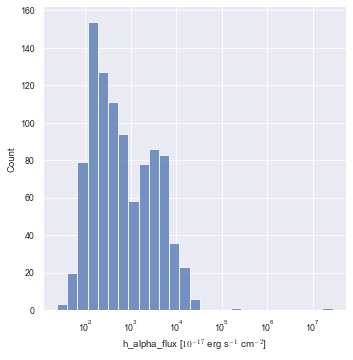

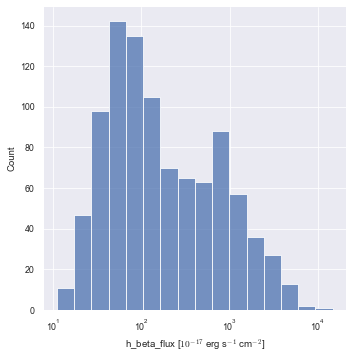

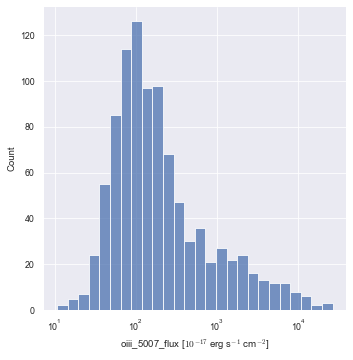

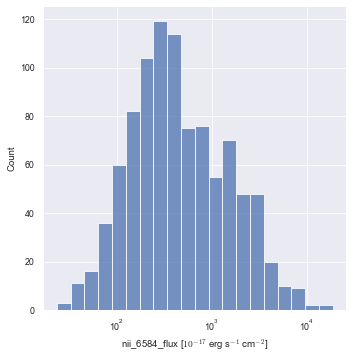

In [17]:
cols = ['h_alpha_flux', 'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux']

for col in cols:
    sns.displot(data=qsos, x=col, log_scale=True)

    plt.xlabel(col + r' [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$]')

    # plt.savefig('distr_' + col + '.pdf')

    plt.show()

# BPT Diagram

In [11]:
qsos['nii_h_alpha'] = qsos.apply(lambda x: x['nii_6584_flux'] / x['h_alpha_flux'], axis=1)
qsos['oiii_h_beta'] = qsos.apply(lambda x: x['oiii_5007_flux'] / x['h_beta_flux'], axis=1)

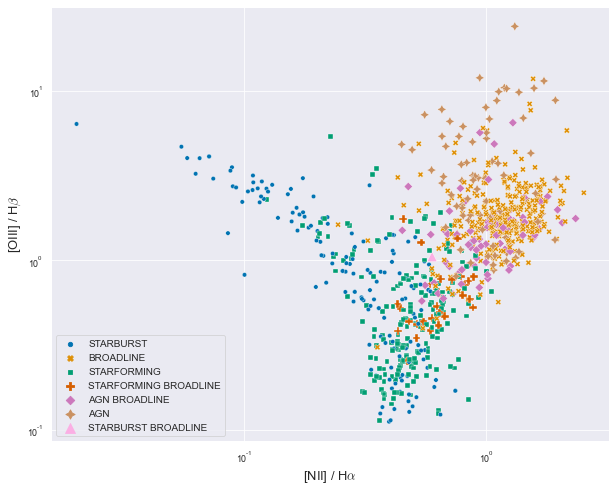

In [14]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind', 
                hue='subclass', style='subclass', size='subclass', sizes=(100, 20))

# plt.title('BPT Diagram with SDSS Sub-Classes', fontsize=14)
plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('BPT_diagram_sdss_subclasses.pdf')

plt.show()

## BPT Diagram with Theoretical Lines

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


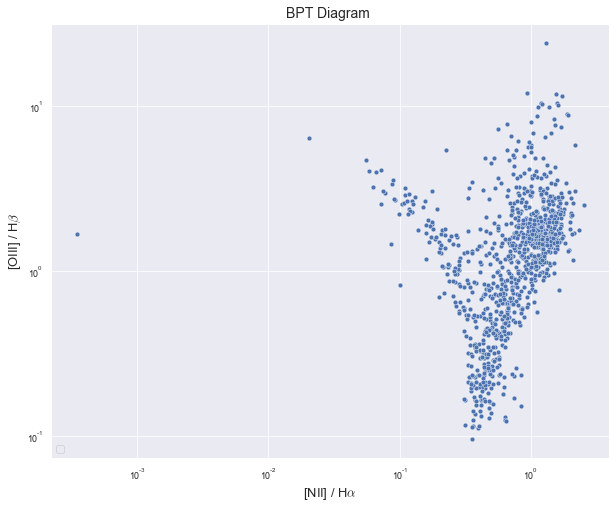

In [30]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=qsos, x='nii_h_alpha', y='oiii_h_beta', palette='colorblind'
                #hue='subclass', style='subclass', size='subclass', sizes=(100, 20)
                )

plt.title('BPT Diagram ', fontsize=14)
plt.xlabel(r'[NII] / H$\alpha$', fontsize=13)
plt.ylabel(r'[OIII] / H$\beta$', fontsize=13)

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left', fontsize=10)

# plt.savefig('BPT_.pdf')

plt.show()

# Mid-IR WISE Colours